In [1]:
import xarray as xr
import os

In [2]:
cdir = r"C:\Users\marc girona\Dropbox\AI4ER\MRes\Guided_team_challenge\urban-climate-downloader"
os.chdir(cdir)
path = 'data/riskindex/netcdf/max_temperature/'
os.getcwd()

'C:\\Users\\marc girona\\Dropbox\\AI4ER\\MRes\\Guided_team_challenge\\urban-climate-downloader'

In [3]:
# Load 'observed' temperature
data_era = xr.open_dataarray(path + 'Madrid_ERAI.nc')
data_era

<xarray.DataArray (time: 13870)>
array([284.25812, 281.57172, 280.14166, ..., 285.6272 , 285.39752, 282.95285],
      dtype=float32)
Coordinates:
    surface      float32 ...
  * time         (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2017-12-31
    day_of_year  (time) int64 ...
    year         (time) int64 ...
    lon          float64 ...
    lat          float64 ...
Attributes:
    long_name:     Maximum 2 metre temperature since previous post-processing
    units:         K
    cell_methods:  day_of_year: year: maximum
    city:          Madrid
    rcp:           None
    model_type:    era

In [4]:
# Load climate model temperature
data_gcm = xr.open_dataarray(path + 'Madrid_rcp45.nc')
data_gcm

<xarray.DataArray (time: 25915)>
array([287.283813, 285.842689, 283.586381, ..., 282.861178, 279.959751,
       281.916748])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2050-12-31
    lon      float64 ...
    lat      float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Maximum Near-Surface Air Temperature
    units:          K
    original_name:  mo: m01s03i236
    cell_methods:   time: maximum
    cell_measures:  area: areacella
    city:           Madrid
    rcp:            rcp45
    model_type:     gcm

In [5]:
from downloader import dataprocessing
# ERA-Interim
df_era = dataprocessing.da_to_df(data_era)
df_era.head()

,data
time,
1980-01-01,284.258118
1980-01-02,281.571716
1980-01-03,280.141663
1980-01-04,280.547821
1980-01-05,279.989441


In [6]:
# GCM
df_gcm = dataprocessing.da_to_df(data_gcm)
df_gcm.head()

,data
time,
1980-01-01,287.283813
1980-01-02,285.842689
1980-01-03,283.586381
1980-01-04,282.834330
1980-01-05,281.538216


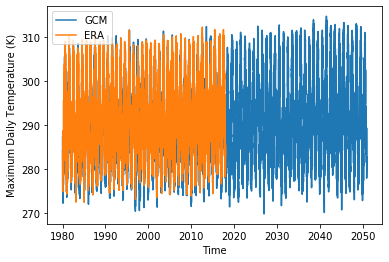

In [9]:
import matplotlib.pyplot as plt 

plt.figure()
plt.plot(df_gcm.index, df_gcm.data, label='GCM')
plt.plot(df_era.index, df_era.data, label='ERA')
plt.xlabel('Time')
plt.ylabel('Maximum Daily Temperature (K)')
plt.legend()
plt.show()

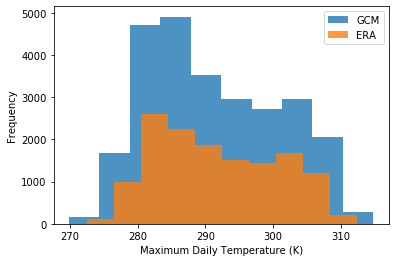

In [10]:
plt.figure()
plt.hist(df_gcm.data, alpha=0.8, label='GCM')
plt.hist(df_era.data, alpha=0.8, label='ERA')
plt.ylabel('Frequency')
plt.xlabel('Maximum Daily Temperature (K)')
plt.legend()
plt.show()

In [14]:
# df_era_past30 = df_era['1980-01-01':'2010-12-31'].copy()
# df_gcm_past30 = df_gcm['1980-01-01':'2010-12-31'].copy()
# df_gcm_fut30 = df_gcm['2020-01-01':'2050-12-31'].copy()

df_era_past = df_era['1980-01-01':'2009-12-31'].copy()
df_gcm_past = df_gcm['1980-01-01':'2009-12-31'].copy()
df_gcm_present = df_gcm['2010-01-01':'2017-12-31'].copy()
df_era_present = df_era['2010-01-01':'2017-12-31'].copy()
df_gcm_future = df_gcm['2020-01-01':'2049-12-31'].copy()

In [43]:
df_era_past = df_era['1980-01-01':'1999-12-31'].copy()
df_gcm_past = df_gcm['1980-01-01':'1999-12-31'].copy()
df_gcm_present = df_gcm['2000-01-01':'2019-12-31'].copy()
df_era_present = df_era['2000-01-01':'2019-12-31'].copy()
df_gcm_future = df_gcm['2020-01-01':'2039-12-31'].copy()

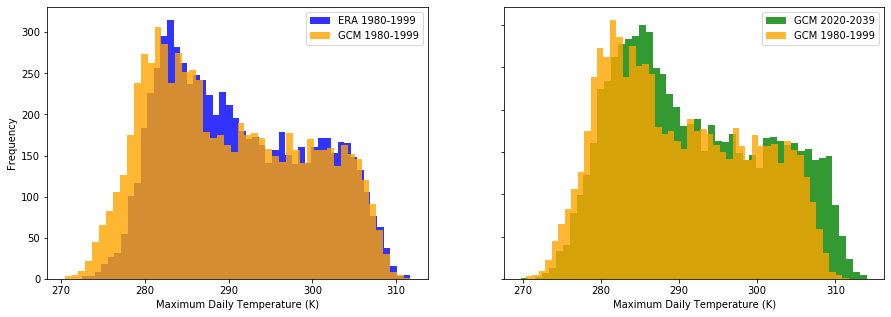

In [45]:
num_bins = 50

past_period = '1980-1999'
present_period = '2000-2019'
future_period = '2020-2039'

fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(df_era_past.data, alpha=0.8, label='ERA '+past_period, color="blue", bins=num_bins)
axs[0].hist(df_gcm_past.data, alpha=0.8, label='GCM '+past_period, color="orange", bins=num_bins)
axs[0].legend()
axs[1].hist(df_gcm_future.data, alpha=0.8, label='GCM '+future_period, color="green", bins=num_bins)
axs[1].hist(df_gcm_past.data, alpha=0.8, label='GCM '+past_period, color="orange", bins=num_bins)
axs[1].legend()

for ax in axs.flat:
    ax.set(xlabel='Maximum Daily Temperature (K)', ylabel='Frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [38]:
# O_REF = observations for reference period (i.e. past)
# T_REF = model simulations for reference period (i.e. past)
# T_RAW = model simulations for period to be corrected (i.e. future or present)

#set to "future" or "present"
time = "future"

o_ref = df_era_past.data.copy()
t_ref = df_gcm_past.data.copy()

o_ref_mean = df_era_past.data.mean()
t_ref_mean = df_gcm_past.data.mean()

o_ref_std = df_era_past.data.std()
t_ref_std = df_gcm_past.data.std()

if time == "future":
    
    t_raw = df_gcm_future.data.copy()
    o_ref_datashift = t_raw - t_raw.to_numpy() + o_ref.to_numpy()
    t_raw_mean = df_gcm_future.data.mean()
    t_raw_std = df_gcm_future.data.std()
    
elif time == "present":
    
    t_raw = df_gcm_present.data.copy()
    o_ref_datashift = t_raw - t_raw.to_numpy() + o_ref.to_numpy()
    t_raw_mean = df_gcm_present.data.mean()
    t_raw_std = df_gcm_present.data.std()

In [39]:
t_sh = t_raw + (o_ref_mean - t_ref_mean)
t_bc = o_ref_mean + (o_ref_std / t_ref_std) * (t_raw - t_ref_mean)
t_del = o_ref_datashift + (t_raw_mean - t_ref_mean)
t_cf = t_raw + (t_raw_std / t_ref_std) * (o_ref_datashift - t_ref_mean)

In [40]:
# plt.figure()
# plt.plot(df_gcm.index, df_gcm.data, label='GCM')
# plt.plot(df_era.index, df_era.data, label='ERA')
# plt.plot(t_sh.index, t_sh.data, label='t_sh')
# plt.plot(t_bc.index, t_bc.data, label='t_bc')
# plt.plot(t_del.index, t_del.data, label='t_del')
# plt.plot(t_cf.index, t_cf.data, label='t_cf')
# plt.xlabel('Time')
# plt.ylabel('Maximum Daily Temperature (K)')
# plt.legend()
# plt.show()

C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Series.data is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Series.data is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Series.data is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Series.data is deprecated and will be removed in a future version
  app.launch_new_instance()
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Series.data is depre

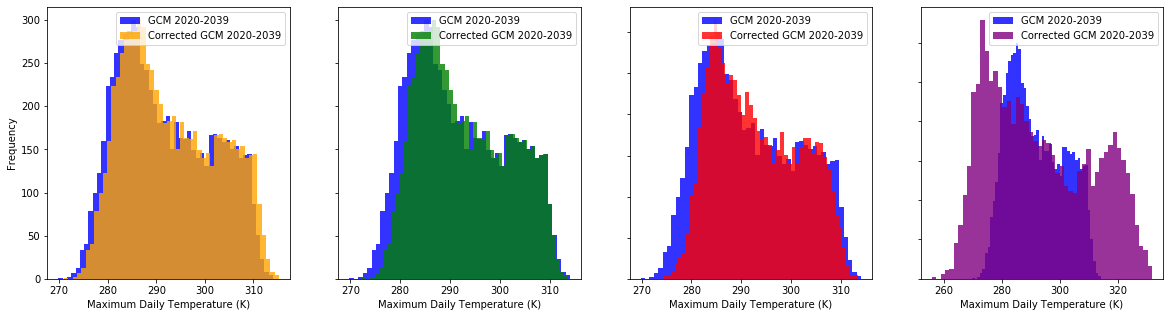

In [41]:
num_bins = 50

fig, axs = plt.subplots(1,4, figsize=(20,5))

if time == "present":
    corrected_period = "2000-2019"
elif time == "future":
    corrected_period = "2020-2039"

axs[0].hist(t_raw.data, alpha=0.8, label='GCM '+corrected_period, color="blue", bins=num_bins)
axs[0].hist(t_sh.data, alpha=0.8, label='Corrected GCM '+corrected_period, color="orange", bins=num_bins)
axs[0].legend()
#axs[0].title.set_text('Mean shift')

axs[1].hist(t_raw.data, alpha=0.8, label='GCM '+corrected_period, color="blue", bins=num_bins)
axs[1].hist(t_bc.data, alpha=0.8, label='Corrected GCM '+corrected_period, color="green", bins=num_bins)
axs[1].legend()
#axs[1].title.set_text('Bias correction (mean and variance)')

axs[2].hist(t_raw.data, alpha=0.8, label='GCM '+corrected_period, color="blue", bins=num_bins)
axs[2].hist(t_del.data, alpha=0.8, label='Corrected GCM '+corrected_period, color="red", bins=num_bins)
axs[2].legend()
#axs[2].title.set_text('Delta change (mean shift only)')

axs[3].hist(t_raw.data, alpha=0.8, label='GCM '+corrected_period, color="blue", bins=num_bins)
axs[3].hist(t_cf.data, alpha=0.8, label='Corrected GCM '+corrected_period, color="purple", bins=num_bins)
axs[3].legend()
#axs[3].title.set_text('Change factor (mean and variance)')


for ax in axs.flat:
    ax.set(xlabel='Maximum Daily Temperature (K)', ylabel='Frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.data is deprecated and will be removed in a future version
  """
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.data is deprecated and will be removed in a future version
  
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Series.data is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Series.data is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Series.data is deprecated and will be removed in a future version
  from ipykernel

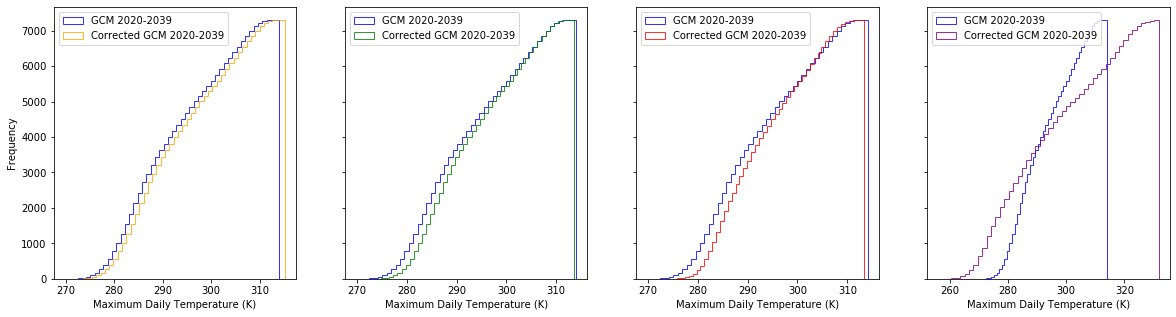

In [42]:
num_bins = 50

fig, axs = plt.subplots(1,4, figsize=(20,5))

axs[0].hist(t_raw.data, alpha=0.8, label='GCM '+corrected_period, color="blue", bins=num_bins, cumulative=True, histtype='step')
axs[0].hist(t_sh.data, alpha=0.8, label='Corrected GCM '+corrected_period, color="orange", bins=num_bins, cumulative=True, histtype='step')
axs[0].legend(loc='upper left')
#axs[0].title.set_text('Mean shift')

axs[1].hist(t_raw.data, alpha=0.8, label='GCM '+corrected_period, color="blue", bins=num_bins, cumulative=True, histtype='step')
axs[1].hist(t_bc.data, alpha=0.8, label='Corrected GCM '+corrected_period, color="green", bins=num_bins, cumulative=True, histtype='step')
axs[1].legend(loc='upper left')
#axs[1].title.set_text('Bias correction (mean and variance)')

axs[2].hist(t_raw.data, alpha=0.8, label='GCM '+corrected_period, color="blue", bins=num_bins, cumulative=True, histtype='step')
axs[2].hist(t_del.data, alpha=0.8, label='Corrected GCM '+corrected_period, color="red", bins=num_bins, cumulative=True, histtype='step')
axs[2].legend(loc='upper left')
#axs[2].title.set_text('Delta change (mean shift only)')

axs[3].hist(t_raw.data, alpha=0.8, label='GCM '+corrected_period, color="blue", bins=num_bins, cumulative=True, histtype='step')
axs[3].hist(t_cf.data, alpha=0.8, label='Corrected GCM '+corrected_period, color="purple", bins=num_bins, cumulative=True, histtype='step')
axs[3].legend(loc='upper left')
#axs[3].title.set_text('Change factor (mean and variance)')


for ax in axs.flat:
    ax.set(xlabel='Maximum Daily Temperature (K)', ylabel='Frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Series.data is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Series.data is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app
C:\Users\marc girona\.conda\envs\team_challenge\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Series.data is deprecated and will be removed in a future version


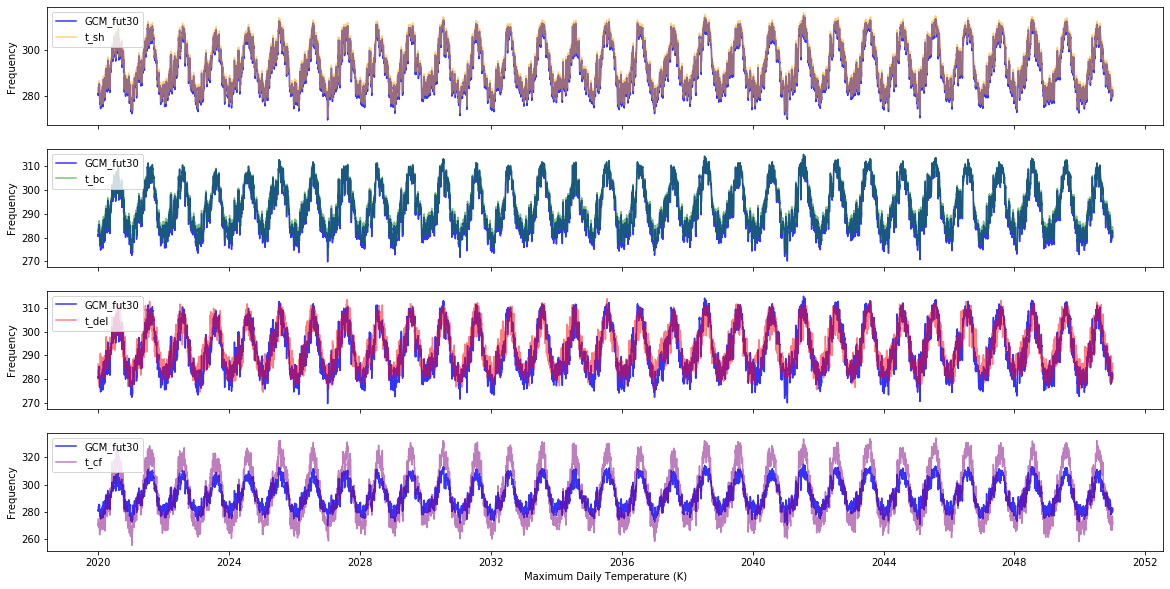

In [84]:
alpha_value_1 = 0.8
alpha_value_2 = 0.5

fig, axs = plt.subplots(4, figsize=(20,10))

axs[0].plot(df_gcm_fut30.index, df_gcm_fut30.data, alpha=alpha_value_1, label='GCM_fut30', color="blue")
axs[0].plot(t_sh.index, t_sh.data, alpha=alpha_value_2, label='t_sh', color="orange")
axs[0].legend()

axs[1].plot(df_gcm_fut30.index, df_gcm_fut30.data, alpha=alpha_value_1, label='GCM_fut30', color="blue")
axs[1].plot(t_bc.index, t_bc.data, alpha=alpha_value_2, label='t_bc', color="green")
axs[1].legend()

axs[2].plot(df_gcm_fut30.index, df_gcm_fut30.data, alpha=alpha_value_1, label='GCM_fut30', color="blue")
axs[2].plot(t_del.index, t_del.data, alpha=alpha_value_2, label='t_del', color="red")
axs[2].legend()

axs[3].plot(df_gcm_fut30.index, df_gcm_fut30.data, alpha=alpha_value_1, label='GCM_fut30', color="blue")
axs[3].plot(t_cf.index, t_cf.data, alpha=alpha_value_2, label='t_cf', color="purple")
axs[3].legend()

for ax in axs.flat:
    ax.set(xlabel='Maximum Daily Temperature (K)', ylabel='Frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()